In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import nibabel as nib
import tensorflow as tf
import sklearn
from sklearn.metrics import roc_curve, auc
import scipy
from scipy.stats import wilcoxon

In [82]:
print(scipy.__version__)

1.7.3


In [61]:
#choose negative and positive slices from the 1st data set

posPatients = np.array([2,4,9,11,12,15,16,17,18,19,21,22,5,6,7,8,13,14])
numberOfSlices = []
locList = []
img_height = 128

for i in range(18):
    if posPatients[i]==12:
        img_path = 'C:/Users/Oona/Documents/Tpc/hnc/anom_data/positiiviset/12_anon/12_maski/12_maskit.img'
    else:
        img_path = 'C:/Users/Oona/Documents/Tpc/hnc/anom_data/positiiviset/{}_anon/{}_maski/{}_maski.img'.format(
                        posPatients[i],posPatients[i],posPatients[i])
    img = nib.load(img_path)
    img_data = img.get_fdata()
    locations = []
    numberOfSlices.append(img_data.shape[2])
    for j in range(img_data.shape[2]):
        slice = img_data[:,:,j]
        if np.max(slice)>0:
            locations.append(j)
    locList.append(np.array(locations))

posList = []

for i in range(18):
    img_path = 'C:/Users/Oona/Documents/Tpc/hnc/anom_data/positiiviset/{}_anon/{}_nifti_pet/{}_nifti_pet.img'.format(
                        posPatients[i],posPatients[i],posPatients[i])
    img = nib.load(img_path)
    img_data = img.get_fdata()
    pos = []
    for j in range(len(locList[i])):
        pos.append(cv2.resize(img_data[:,:,locList[i][j]],(img_height,img_height)))
    posList.append(pos)

posList = posList[0:12]+[posList[12]+posList[13]]+[posList[14]+posList[15]]+[posList[16]+posList[17]]

negPatients = np.array([4,18,34,39,28,38,44,6,47,25,23,15,12,13,31,32,2,3])
negNumberOfSlices = []
negList = []

negLocList = [np.array([3, 4, 5]),
 np.array([10, 11, 12, 13, 14, 15, 16, 17, 18]),
 np.array([ 1,  2,  3, 4, 5, 6, 7, 8]),
 np.array([30, 31, 32, 33, 34, 35, 36, 37, 38]),
 np.array([11, 12, 13, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 np.array([11, 12, 13, 14, 15, 16, 17]),
 np.array([1, 2, 3, 4, 5]),
 np.array([ 3,  4, 5, 6, 7, 8, 9, 23, 24, 25, 26]),
 np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]),
 np.array([12, 13, 14, 15, 16, 17, 18, 19]),
 np.array([10,  11,  12,  13,  14,  15,  16,  17, 18, 19, 20, 21]),
 np.array([29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]),
 np.array([7, 8, 9, 10, 11, 12, 13,  14,  15, 16, 17, 18]),
 np.array([18, 19, 20, 27, 28]),
 np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]),
 np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]),
 np.array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]),
 np.array([7, 8, 9, 10, 11, 12, 13])]

for i in range(18):
    img_path='C:/Users/Oona/Documents/Tpc/hnc/anom_data/negatiiviset/{}/N{}_nifti_pet/N{}_nifti_pet.img'.format(
        negPatients[i],negPatients[i],negPatients[i])
    img = nib.load(img_path)
    img_data = img.get_fdata()
    negNumberOfSlices.append(img_data.shape[2])
    neg = []
    for j in range(len(negLocList[i])):
        neg.append(cv2.resize(img_data[:,:,negLocList[i][j]],(img_height,img_height)))
    negList.append(neg)

negList = negList[0:12]+[negList[12]+negList[13]]+[negList[14]+negList[15]]+[negList[16]+negList[17]]

slicesForInd=[]
for i in range(15):
    slicesForInd.append(2*len(negList[i]))

posChoices1=[]
posChoices3=[]
posChoices5=[]

for i in range(2**15):
    d=np.zeros((15))
    s=0
    for j in range(15):
        if i>=2**(14-j):
            d[j]=1
            i-=2**(14-j)
            s+=slicesForInd[j]
    if 0.10<=s/356<0.13:
        indexes=[]
        for j in range(15):
            if d[j]==1:
                indexes.append(j)
        posChoices1.append(indexes)
    if 0.30<=s/356<0.33:
        indexes=[]
        for j in range(15):
            if d[j]==1:
                indexes.append(j)
        posChoices3.append(indexes)
    if 0.50<=s/356<0.53:
        indexes=[]
        for j in range(15):
            if d[j]==1:
                indexes.append(j)
        posChoices5.append(indexes)

In [57]:
#choose negative and positive slices from the 2nd data set

posFiles=os.listdir('C:/Users/Oona/Documents/Tpc/isch/polar_map_data/uusi/pos')
negFiles=os.listdir('C:/Users/Oona/Documents/Tpc/isch/polar_map_data/uusi/neg')
num=min(len(posFiles),len(negFiles))
img_height = 128

posList=[]
negList=[]
for i in range(num):
    posList.append(np.mean(cv2.resize(cv2.imread('C:/Users/Oona/Documents/Tpc/isch/polar_map_data/uusi/pos/{}'.format(posFiles[i])),
        (img_height,img_height)),axis=2))
    negList.append(np.mean(cv2.resize(cv2.imread('C:/Users/Oona/Documents/Tpc/isch/polar_map_data/uusi/neg/{}'.format(negFiles[i])),
        (img_height,img_height)),axis=2))

#plt.imshow(negList[0],cmap='gray')

In [37]:
#choose negative and positive slices from the 3rd data set

indexVector = np.hstack((np.array(range(1,44)),np.array(range(45,59)),np.array(range(60,67)),np.array(range(68,82))))
posList=[]
negList=[]
img_height = 128

for i in range(len(indexVector)):  
    img_data = nib.load('E:/carimas_files/{}/ct.nifti.img'.format(indexVector[i])).get_fdata()
    csli=cv2.resize(np.max(img_data,axis=1),(img_height,img_height))
    ssli=cv2.resize(np.max(img_data,axis=0),(img_height,img_height))
    posList.append(csli)
    negList.append(ssli)

In [ ]:
#plot one slice

img=negList[0]
img=cv2.rotate(img,cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)
plt.imshow(img,cmap='gray')
fig=plt.gcf()
plt.axis('off')
#fig.savefig('fig_ct_neg',bbox_inches='tight')
plt.show()

In [3]:
def divideIntoSets(posList,negList,testSetPairs):

    x_train=[]
    y_train=[]
    x_test=[]
    y_test=[]

    if type(posList[0])==list:
        for i in range(len(posList)):
            if i in testSetPairs:
                for j in range(len(posList[i])):
                    img=negList[i][j]
                    img=(img-np.min(img))/(np.max(img)-np.min(img))*2-1
                    x_test.append(img)
                    y_test.append(0)
                    img=posList[i][j]
                    img=(img-np.min(img))/(np.max(img)-np.min(img))*2-1
                    x_test.append(img)
                    y_test.append(1)
            else:
                for j in range(len(posList[i])):
                    img=negList[i][j]
                    img=(img-np.min(img))/(np.max(img)-np.min(img))*2-1
                    x_train.append(img)
                    y_train.append(0)
                    img=posList[i][j]
                    img=(img-np.min(img))/(np.max(img)-np.min(img))*2-1
                    x_train.append(img)
                    y_train.append(1)
    else:
        for i in range(len(posList)):
            if i in testSetPairs:
                img=negList[i]
                img=(img-np.min(img))/(np.max(img)-np.min(img))*2-1
                x_test.append(img)
                y_test.append(0)
                img=posList[i]
                img=(img-np.min(img))/(np.max(img)-np.min(img))*2-1
                x_test.append(img)
                y_test.append(1)
            else:
                img=negList[i]
                img=(img-np.min(img))/(np.max(img)-np.min(img))*2-1
                x_train.append(img)
                y_train.append(0)
                img=posList[i]
                img=(img-np.min(img))/(np.max(img)-np.min(img))*2-1
                x_train.append(img)
                y_train.append(1)

    x_train=np.array(x_train)
    y_train=np.array(y_train)
    x_test=np.array(x_test)
    y_test=np.array(y_test)

    return([x_train,y_train,x_test,y_test])

In [3]:
def evaluatePreds(predictions,trainPreds):

    y_train=np.array([0,1]*int(trainPreds.shape[0]/2))
    y_test=np.array([0,1]*int(predictions.shape[0]/2))
    fpr, tpr, thresholds = roc_curve(y_train, trainPreds, drop_intermediate=False)
    J_stats = tpr - fpr
    opt_threshold = thresholds[np.argmax(J_stats)]

    TN = 0
    FN = 0
    TP = 0
    FP = 0

    for i in range(len(y_test)):
        if predictions[i]<opt_threshold:
            if y_test[i]==0:
                TN+=1
            else:
                FN+=1
        else:
            if y_test[i]==1:
                TP+=1
            else:
                FP+=1

    acc = np.round((TN+TP)/(TN+FN+TP+FP),3)
    sen = np.round(TP/(FN+TP),3)
    spe = np.round(TN/(TN+FP),3)
    fpr, tpr, thresholds = roc_curve(y_test, predictions, drop_intermediate=False)
    auc1 = np.round(auc(fpr, tpr),3)

    return([acc,sen,spe,auc1])
    

In [5]:
def predict(x_train,y_train,x_test):

    model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=(img_height,img_height,1)),
                                    tf.keras.layers.Conv2D(16, 3, activation='relu'),
                                    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
                                    tf.keras.layers.Conv2D(32, 3, activation='relu'),
                                    tf.keras.layers.Conv2D(32, 3, activation='relu'),
                                    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
                                    tf.keras.layers.Conv2D(64, 3, activation='relu'),
                                    tf.keras.layers.Conv2D(64, 3, activation='relu'),
                                    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
                                    tf.keras.layers.Conv2D(128, 3, activation='relu'),
                                    tf.keras.layers.Conv2D(128, 3, activation='relu'),
                                    tf.keras.layers.MaxPooling2D(strides=(2, 2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(64, activation='relu'),
                                    tf.keras.layers.Dense(32, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
    ] 
    )

    model.compile(
        optimizer=tf.keras.optimizers.SGD(1e-3),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=[tf.keras.metrics.BinaryAccuracy()]
    )

    numEpochs=50
    model.fit(x=x_train,y=y_train,epochs=numEpochs,validation_split=0.3,shuffle=True)
    predictions=model.predict(x_test)
    trainPreds=model.predict(x_train)

    return([predictions,trainPreds])

In [6]:
for i in range(0,100):
    
    #j = int(np.random.choice(range(len(posChoices1)), size=1))
    #testSetPairs=np.array(posChoices1[j])
    #testSetPairs=[5,8]
    testSetPairs=[3,7]
    x_train,y_train,x_test,y_test=divideIntoSets(posList,negList,testSetPairs)
    predictions,trainPreds = predict(x_train,y_train,x_test)
    #np.savetxt('imp_hnc_1_testSetPairs_{}.txt'.format(i),testSetPairs)
    np.savetxt('imp_hnc_l_1_trainPreds_{}.txt'.format(i),trainPreds)
    np.savetxt('imp_hnc_l_1_predictions_{}.txt'.format(i),predictions)

    #j = int(np.random.choice(range(len(posChoices3)), size=1))
    #testSetPairs=np.array(posChoices3[j])
    #testSetPairs=[0,2,4,10,12]
    testSetPairs=[1,6,7,11,14]
    x_train,y_train,x_test,y_test=divideIntoSets(posList,negList,testSetPairs)
    predictions,trainPreds = predict(x_train,y_train,x_test)
    #np.savetxt('imp_hnc_3_testSetPairs_{}.txt'.format(i),testSetPairs)
    np.savetxt('imp_hnc_l_3_trainPreds_{}.txt'.format(i),trainPreds)
    np.savetxt('imp_hnc_l_3_predictions_{}.txt'.format(i),predictions)

    #j = int(np.random.choice(range(len(posChoices5)), size=1))
    #testSetPairs=np.array(posChoices5[j])
    #testSetPairs=[2,4,7,9,12,13]
    testSetPairs=[0,5,9,10,11,13,14]
    x_train,y_train,x_test,y_test=divideIntoSets(posList,negList,testSetPairs)
    predictions,trainPreds = predict(x_train,y_train,x_test)
    #np.savetxt('imp_hnc_5_testSetPairs_{}.txt'.format(i),testSetPairs)
    np.savetxt('imp_hnc_l_5_trainPreds_{}.txt'.format(i),trainPreds)
    np.savetxt('imp_hnc_l_5_predictions_{}.txt'.format(i),predictions)

Epoch 1/50
7/7 [==============================] - 11s 1s/step - loss: 0.6934 - binary_accuracy: 0.3348 - val_loss: 0.6934 - val_binary_accuracy: 0.2947
Epoch 2/50
7/7 [==============================] - 8s 1s/step - loss: 0.6934 - binary_accuracy: 0.3756 - val_loss: 0.6934 - val_binary_accuracy: 0.2842
Epoch 3/50
7/7 [==============================] - 7s 1s/step - loss: 0.6933 - binary_accuracy: 0.3846 - val_loss: 0.6933 - val_binary_accuracy: 0.3263
Epoch 4/50
7/7 [==============================] - 8s 1s/step - loss: 0.6933 - binary_accuracy: 0.4299 - val_loss: 0.6933 - val_binary_accuracy: 0.3474
Epoch 5/50
7/7 [==============================] - 6s 919ms/step - loss: 0.6932 - binary_accuracy: 0.5023 - val_loss: 0.6933 - val_binary_accuracy: 0.3895
Epoch 6/50
7/7 [==============================] - 6s 924ms/step - loss: 0.6932 - binary_accuracy: 0.5158 - val_loss: 0.6933 - val_binary_accuracy: 0.4105
Epoch 7/50
7/7 [==============================] - 7s 984ms/step - loss: 0.6932 - binary

In [6]:
for i in range(0,100):
    
    #testSetPairs = np.array(np.random.choice(range(56), size=6, replace=False))
    #testSetPairs = [18,19,31,34,35,42]
    testSetPairs = [7,11,32,33,42,46]
    x_train,y_train,x_test,y_test=divideIntoSets(posList,negList,testSetPairs)
    predictions,trainPreds = predict(x_train,y_train,x_test)
    #np.savetxt('imp_isch_1_testSetPairs_{}.txt'.format(i),testSetPairs)
    np.savetxt('imp_isch_l_1_trainPreds_{}.txt'.format(i),trainPreds)
    np.savetxt('imp_isch_l_1_predictions_{}.txt'.format(i),predictions)

    #testSetPairs = np.array(np.random.choice(range(56), size=17, replace=False))
    #testSetPairs = [0,3,8,9,11,12,14,24,26,27,28,31,33,34,38,43,53]
    testSetPairs = [0,3,12,18,22,35,36,37,38,39,41,42,46,48,52,53,54]
    x_train,y_train,x_test,y_test=divideIntoSets(posList,negList,testSetPairs)
    predictions,trainPreds = predict(x_train,y_train,x_test)
    #np.savetxt('imp_isch_3_testSetPairs_{}.txt'.format(i),testSetPairs)
    np.savetxt('imp_isch_l_3_trainPreds_{}.txt'.format(i),trainPreds)
    np.savetxt('imp_isch_l_3_predictions_{}.txt'.format(i),predictions)

    #testSetPairs = np.array(np.random.choice(range(56), size=28, replace=False))
    #testSetPairs = [1,2,3,4,5,8,11,12,15,16,17,18,19,22,26,29,32,36,38,39,40,41,42,44,45,47,50,54]
    testSetPairs = [4,5,6,8,9,12,13,14,15,16,17,19,20,25,28,31,33,34,35,36,37,41,43,44,47,50,51,54]
    x_train,y_train,x_test,y_test=divideIntoSets(posList,negList,testSetPairs)
    predictions,trainPreds = predict(x_train,y_train,x_test)
    #np.savetxt('imp_isch_5_testSetPairs_{}.txt'.format(i),testSetPairs)
    np.savetxt('imp_isch_l_5_trainPreds_{}.txt'.format(i),trainPreds)
    np.savetxt('imp_isch_l_5_predictions_{}.txt'.format(i),predictions)

Epoch 1/50
3/3 [==============================] - 4s 827ms/step - loss: 0.6931 - binary_accuracy: 0.5000 - val_loss: 0.6932 - val_binary_accuracy: 0.4667
Epoch 2/50
3/3 [==============================] - 3s 718ms/step - loss: 0.6930 - binary_accuracy: 0.5000 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 2s 622ms/step - loss: 0.6930 - binary_accuracy: 0.5000 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 4/50
3/3 [==============================] - 2s 665ms/step - loss: 0.6929 - binary_accuracy: 0.5000 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 5/50
3/3 [==============================] - 2s 635ms/step - loss: 0.6929 - binary_accuracy: 0.5000 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 6/50
3/3 [==============================] - 2s 660ms/step - loss: 0.6929 - binary_accuracy: 0.5000 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 7/50
3/3 [==============================] - 2s 649ms/step - loss: 0.69

In [6]:
for i in range(0,100):
    
    #testSetPairs = np.array(np.random.choice(range(78), size=8, replace=False))
    testSetPairs = [0,14,21,34,61,64,69,73]
    x_train,y_train,x_test,y_test=divideIntoSets(posList,negList,testSetPairs)
    predictions,trainPreds = predict(x_train,y_train,x_test)
    #np.savetxt('imp_sli_1_testSetPairs_{}.txt'.format(i),testSetPairs)
    np.savetxt('imp_sli_l_1_trainPreds_{}.txt'.format(i),trainPreds)
    np.savetxt('imp_sli_l_1_predictions_{}.txt'.format(i),predictions)

    #testSetPairs = np.array(np.random.choice(range(78), size=24, replace=False))
    testSetPairs = [2,6,8,9,17,20,21,22,35,36,37,39,40,42,45,50,51,52,53,54,57,59,65,71]
    x_train,y_train,x_test,y_test=divideIntoSets(posList,negList,testSetPairs)
    predictions,trainPreds = predict(x_train,y_train,x_test)
    #np.savetxt('imp_sli_3_testSetPairs_{}.txt'.format(i),testSetPairs)
    np.savetxt('imp_sli_l_3_trainPreds_{}.txt'.format(i),trainPreds)
    np.savetxt('imp_sli_l_3_predictions_{}.txt'.format(i),predictions)

    #testSetPairs = np.array(np.random.choice(range(78), size=39, replace=False))
    testSetPairs = [2,4,5,6,9,10,14,15,17,18,22,23,25,26,28,29,31,35,38,39,40,45,46,49,50,51,52,54,57,58,61,63,64,66,70,73,74,76,77]
    x_train,y_train,x_test,y_test=divideIntoSets(posList,negList,testSetPairs)
    predictions,trainPreds = predict(x_train,y_train,x_test)
    #np.savetxt('imp_sli_5_testSetPairs_{}.txt'.format(i),testSetPairs)
    np.savetxt('imp_sli_l_5_trainPreds_{}.txt'.format(i),trainPreds)
    np.savetxt('imp_sli_l_5_predictions_{}.txt'.format(i),predictions)

Epoch 1/50
4/4 [==============================] - 5s 995ms/step - loss: 0.6929 - binary_accuracy: 0.6020 - val_loss: 0.6928 - val_binary_accuracy: 0.5000
Epoch 2/50
4/4 [==============================] - 4s 853ms/step - loss: 0.6929 - binary_accuracy: 0.5000 - val_loss: 0.6928 - val_binary_accuracy: 0.5000
Epoch 3/50
4/4 [==============================] - 4s 877ms/step - loss: 0.6928 - binary_accuracy: 0.5000 - val_loss: 0.6928 - val_binary_accuracy: 0.5000
Epoch 4/50
4/4 [==============================] - 3s 804ms/step - loss: 0.6928 - binary_accuracy: 0.5000 - val_loss: 0.6927 - val_binary_accuracy: 0.5000
Epoch 5/50
4/4 [==============================] - 4s 857ms/step - loss: 0.6928 - binary_accuracy: 0.5000 - val_loss: 0.6927 - val_binary_accuracy: 0.5000
Epoch 6/50
4/4 [==============================] - 3s 845ms/step - loss: 0.6928 - binary_accuracy: 0.5000 - val_loss: 0.6927 - val_binary_accuracy: 0.5000
Epoch 7/50
4/4 [==============================] - 3s 772ms/step - loss: 0.69

In [51]:
#choose the test sets for the 1st data set

list=[]

for i in range(100):
    testSetPairs=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/hnc/imp_hnc_5_testSetPairs_{}.txt'.format(i))
    trainPreds=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/hnc/imp_hnc_5_trainPreds_{}.txt'.format(i))
    predictions=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/hnc/imp_hnc_5_predictions_{}.txt'.format(i))
    list.append([evaluatePreds(predictions,trainPreds)[3],testSetPairs])

#print(list)

for j in range(15):
    u=[]
    for i in range(100):
        if j in list[i][1]:
            u.append(list[i][0])
    if len(u)>0:
        print(j,np.median(u))

for i in range(100):
    if list[i][0]<0.5:
        print(list[i])

u=[]
for i in range(100):
    if 1 in list[i][1] and 7 in list[i][1] and 11 in list[i][1]:
        u.append(list[i][0])
print(np.median(u))

#if 1, highest for [5,8], lowest for [3,7]
#if 3, highest for [0,2,4,10,12], lowest for [1,6,7,11,14]
#if 5, highest for [2,4,7,9,12,13], lowest for [0,5,9,10,11,13,14]

0 0.724
1 0.718
2 0.767
3 0.724
4 0.726
5 0.72
6 0.712
7 0.731
8 0.7235
9 0.713
10 0.7675000000000001
11 0.719
12 0.7384999999999999
13 0.746
14 0.719
[0.44, array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  9., 11., 12.])]
[0.228, array([ 0.,  5.,  9., 10., 11., 13., 14.])]
[0.25, array([ 0.,  1.,  2.,  4.,  5.,  8.,  9., 10., 12.])]
[0.452, array([ 0.,  1.,  5.,  8., 10., 11., 12., 14.])]
0.6825


In [16]:
#choose the test sets for the 2nd data set

list=[]

for i in range(100):
    testSetPairs=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/isch/imp_isch_5_testSetPairs_{}.txt'.format(i))
    trainPreds=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/isch/imp_isch_5_trainPreds_{}.txt'.format(i))
    predictions=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/isch/imp_isch_5_predictions_{}.txt'.format(i))
    list.append([evaluatePreds(predictions,trainPreds)[3],testSetPairs])

#print(list)

for i in range(100):
    if list[i][0]<0.5:
        print(list[i])

#if 1, highest for [18,19,31,34,35,42], lowest for [7,11,32,33,42,46]
#if 3, highest for [0,3,8,9,11,12,14,24,26,27,28,31,33,34,38,43,53], lowest for [0,3,12,18,22,35,36,37,38,39,41,42,46,48,52,53,54]
#if 5, highest for [1,2,3,4,5,8,11,12,15,16,17,18,19,22,26,29,32,36,38,39,40,41,42,44,45,47,50,54], 
# lowest for [4,5,6,8,9,12,13,14,15,16,17,19,20,25,28,31,33,34,35,36,37,41,43,44,47,50,51,54]

[0.496, array([55., 21., 54., 19., 39., 38., 34., 26., 27., 43., 46., 13., 22.,
       32., 31.,  4.,  0.,  2., 45., 12.,  1., 48., 36., 28., 11., 49.,
       51., 44.])]
[0.384, array([ 6., 29., 10., 23.,  7.,  9., 27., 51., 20., 31., 24.,  8.,  2.,
       11., 44., 52., 41., 28., 49.,  0., 35., 16., 30., 43., 47., 25.,
       40., 18.])]
[0.481, array([55., 11., 48., 33., 19., 14., 38.,  4., 31., 20., 28.,  1., 50.,
       42., 27., 34., 25.,  0., 43., 54., 51.,  9., 18.,  3., 35., 12.,
       21., 23.])]
[0.333, array([12.,  4., 35., 51., 50., 54., 41., 16., 13., 25., 17., 14.,  6.,
       47.,  9., 36., 31., 19.,  8., 28., 43., 34., 33., 44.,  5., 37.,
       20., 15.])]
[0.374, array([10.,  3., 16.,  8., 24., 21., 41., 33., 18., 31., 26., 36., 29.,
       45., 52., 46., 44., 25., 22.,  2., 12., 42., 40., 49., 17., 50.,
       35., 11.])]


In [38]:
#choose the test sets for the 3rd data set

list=[]

for i in range(100):
    testSetPairs=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/sli/imp_sli_5_testSetPairs_{}.txt'.format(i))
    trainPreds=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/sli/imp_sli_5_trainPreds_{}.txt'.format(i))
    predictions=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/sli/imp_sli_5_predictions_{}.txt'.format(i))
    list.append([evaluatePreds(predictions,trainPreds)[3],testSetPairs])

#print(list)

for i in range(100):
    if list[i][0]<0.5:
        print(list[i])

for j in range(78):
    u=[]
    for i in range(100):
        if j in list[i][1]:
            u.append(list[i][0])
    if len(u)>0:
        if np.mean(u)<0.5:
            print(j,np.mean(u),len(u))

for j in range(78):
    u=0
    for i in range(100):
        if j in list[i][1] and list[i][0]==1:
            u+=1
    if u>10:
        print(j,u)

#if 1, highest for [10,11,18,28,31,33,42,45], lowest for [0,14,21,34,61,64,69,73]
#if 3, highest for [0,4,6,7,8,12,14,16,23,27,28,35,38,40,45,47,48,51,56,57,63,67,70,77], 
# lowest for [2,6,8,9,17,20,21,22,35,36,37,39,40,42,45,50,51,52,53,54,57,59,65,71]
#if 5, highest for [0,1,3,8,9,12,23,15,16,17,19,21,25,27,29,30,32,33,36,37,40,41,42,44,46,48,49,50,51,53,57,59,61,62,66,67,72,76,77], 
#lowest for [2,4,5,6,9,10,14,15,17,18,22,23,25,26,28,29,31,35,38,39,40,45,46,49,50,51,52,54,57,58,61,63,64,66,70,73,74,76,77]

[0.249, array([38., 14., 39., 66., 10., 28., 40., 46., 51.,  2.,  5., 52., 63.,
        4., 76., 45., 17., 50., 54., 57., 49.,  9., 70., 31., 23., 26.,
       73., 25., 22., 58., 61., 18., 35., 74., 15., 77.,  6., 29., 64.])]


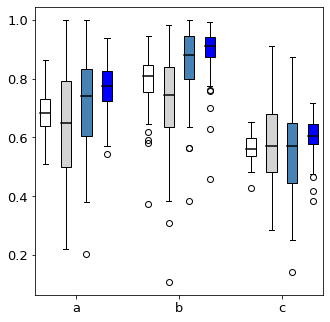

In [5]:
df=np.zeros((4))
dfh=np.zeros((4))
dfl=np.zeros((4))

typ='hnc'
num=3
for i in range(100):
    trainPreds=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/{}/imp_{}_{}_trainPreds_{}.txt'.format(typ,typ,num,i))
    predictions=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/{}/imp_{}_{}_predictions_{}.txt'.format(typ,typ,num,i))
    df=np.vstack((df,evaluatePreds(predictions,trainPreds)))
    trainPreds=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/{}/imp_{}_h_{}_trainPreds_{}.txt'.format(typ,typ,num,i))
    predictions=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/{}/imp_{}_h_{}_predictions_{}.txt'.format(typ,typ,num,i))
    dfh=np.vstack((dfh,evaluatePreds(predictions,trainPreds)))
    trainPreds=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/{}/imp_{}_l_{}_trainPreds_{}.txt'.format(typ,typ,num,i))
    predictions=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/{}/imp_{}_l_{}_predictions_{}.txt'.format(typ,typ,num,i))
    dfl=np.vstack((dfl,evaluatePreds(predictions,trainPreds)))

df=np.delete(df,0,0)
dfh=np.delete(dfh,0,0)
dfl=np.delete(dfl,0,0)

d=[df[:,0],df[:,1],df[:,2],df[:,3],dfh[:,0],dfh[:,1],dfh[:,2],dfh[:,3],dfl[:,0],dfl[:,1],dfl[:,2],dfl[:,3]]

fig=plt.figure(figsize=(4,4))
axi=fig.add_axes([0,0,1,1])
bplot=axi.boxplot(d,patch_artist=True,positions=[1,2,3,4,6,7,8,9,11,12,13,14])
colors=3*['white','lightgray','steelblue','blue']
for patch,color in zip(bplot['boxes'],colors):
    patch.set_facecolor(color)
for median in bplot['medians']:
    median.set(color='black',linewidth=1.5)
plt.xticks([2.5,7.5,12.5],['a','b','c'],fontsize=13)
plt.yticks(fontsize=13)
fig=plt.gcf()
plt.show()
fig.savefig('fig_plt_hnc_3',bbox_inches='tight')

In [80]:
df=np.zeros((4))
dfh=np.zeros((4))
dfl=np.zeros((4))

typ='hnc'
num=3
j=1
for i in range(100):
    trainPreds=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/{}/imp_{}_{}_trainPreds_{}.txt'.format(typ,typ,num,i))
    predictions=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/{}/imp_{}_{}_predictions_{}.txt'.format(typ,typ,num,i))
    df=np.vstack((df,evaluatePreds(predictions,trainPreds)))
    trainPreds=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/{}/imp_{}_h_{}_trainPreds_{}.txt'.format(typ,typ,num,i))
    predictions=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/{}/imp_{}_h_{}_predictions_{}.txt'.format(typ,typ,num,i))
    dfh=np.vstack((dfh,evaluatePreds(predictions,trainPreds)))
    trainPreds=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/{}/imp_{}_l_{}_trainPreds_{}.txt'.format(typ,typ,num,i))
    predictions=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/{}/imp_{}_l_{}_predictions_{}.txt'.format(typ,typ,num,i))
    dfl=np.vstack((dfl,evaluatePreds(predictions,trainPreds)))

df=np.delete(df,0,0)
dfh=np.delete(dfh,0,0)
dfl=np.delete(dfl,0,0)

print(np.median(df[:,j]))
print(np.median(dfh[:,j]))
print(np.median(dfl[:,j]))

print(np.mean(df[:,j]))
print(np.mean(dfh[:,j]))
print(np.mean(dfl[:,j]))

print(wilcoxon(dfh[:,j],df[:,j]))
print(wilcoxon(dfl[:,j],df[:,j]))
print(wilcoxon(dfh[:,j],dfl[:,j]))
print(wilcoxon(dfh[:,j],df[:,j],alternative='greater'))
print(wilcoxon(dfl[:,j],df[:,j],alternative='less'))

0.649
0.745
0.571
0.64943
0.7252600000000001
0.57733
WilcoxonResult(statistic=1639.5, pvalue=0.0035436193654037815)
WilcoxonResult(statistic=1544.5, pvalue=0.0011632375112468256)
WilcoxonResult(statistic=805.0, pvalue=3.3387659440769732e-09)
WilcoxonResult(statistic=3310.5, pvalue=0.0017718096827018907)
WilcoxonResult(statistic=1544.5, pvalue=0.0005816187556234128)


In [20]:
df=np.zeros((4))
dfh=np.zeros((4))
dfl=np.zeros((4))
r=np.zeros((3,3))

typ='hnc'
j=1
for k in range(3):
    num=int([1,3,5][k])
    for i in range(100):
        trainPreds=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/{}/imp_{}_{}_trainPreds_{}.txt'.format(typ,typ,num,i))
        predictions=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/{}/imp_{}_{}_predictions_{}.txt'.format(typ,typ,num,i))
        df=np.vstack((df,evaluatePreds(predictions,trainPreds)))
        trainPreds=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/{}/imp_{}_h_{}_trainPreds_{}.txt'.format(typ,typ,num,i))
        predictions=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/{}/imp_{}_h_{}_predictions_{}.txt'.format(typ,typ,num,i))
        dfh=np.vstack((dfh,evaluatePreds(predictions,trainPreds)))
        trainPreds=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/{}/imp_{}_l_{}_trainPreds_{}.txt'.format(typ,typ,num,i))
        predictions=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/{}/imp_{}_l_{}_predictions_{}.txt'.format(typ,typ,num,i))
        dfl=np.vstack((dfl,evaluatePreds(predictions,trainPreds)))
    df=np.delete(df,0,0)
    dfh=np.delete(dfh,0,0)
    dfl=np.delete(dfl,0,0)
    r[k,0]=round(np.median(df[:,j]),3)
    r[k,1]=round(np.median(dfh[:,j]),3)
    r[k,2]=round(np.median(dfl[:,j]),3)

print(r)

[[0.689 0.55  0.8  ]
 [0.667 0.636 0.679]
 [0.675 0.709 0.666]]


In [5]:
def f_test(x,y):

    x=np.array(x)
    y=np.array(y)
    f=np.var(x,ddof=1)/np.var(y,ddof=1)
    dfn=x.size-1
    dfd=y.size-1
    p=2*min(1-scipy.stats.f.cdf(f,dfn,dfd),scipy.stats.f.cdf(f,dfn,dfd))
    return(p)

In [14]:
df=np.zeros((4))
dfh=np.zeros((4))
dfl=np.zeros((4))

typ='sli'
num=3
j=3
for i in range(100):
    trainPreds=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/{}/imp_{}_{}_trainPreds_{}.txt'.format(typ,typ,num,i))
    predictions=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/{}/imp_{}_{}_predictions_{}.txt'.format(typ,typ,num,i))
    df=np.vstack((df,evaluatePreds(predictions,trainPreds)))
    trainPreds=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/{}/imp_{}_h_{}_trainPreds_{}.txt'.format(typ,typ,num,i))
    predictions=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/{}/imp_{}_h_{}_predictions_{}.txt'.format(typ,typ,num,i))
    dfh=np.vstack((dfh,evaluatePreds(predictions,trainPreds)))
    trainPreds=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/{}/imp_{}_l_{}_trainPreds_{}.txt'.format(typ,typ,num,i))
    predictions=np.loadtxt('C:/Users/Oona/Documents/Tpc/imp/results/{}/imp_{}_l_{}_predictions_{}.txt'.format(typ,typ,num,i))
    dfl=np.vstack((dfl,evaluatePreds(predictions,trainPreds)))

df=np.delete(df,0,0)
dfh=np.delete(dfh,0,0)
dfl=np.delete(dfl,0,0)

print(np.std(df[:,j]))
print(np.std(dfh[:,j]))
print(np.std(dfl[:,j]))

print(f_test(dfh[:,j],df[:,j]))
print(f_test(dfl[:,j],df[:,j]))

0.11663207106109366
0.08068796378642852
0.1098448888205546
0.0002985087855127924
0.5519352130050358
